## 13장 군집분석

### (1) 계층적 군집분석 실습

- 변수 지정 및 전처리

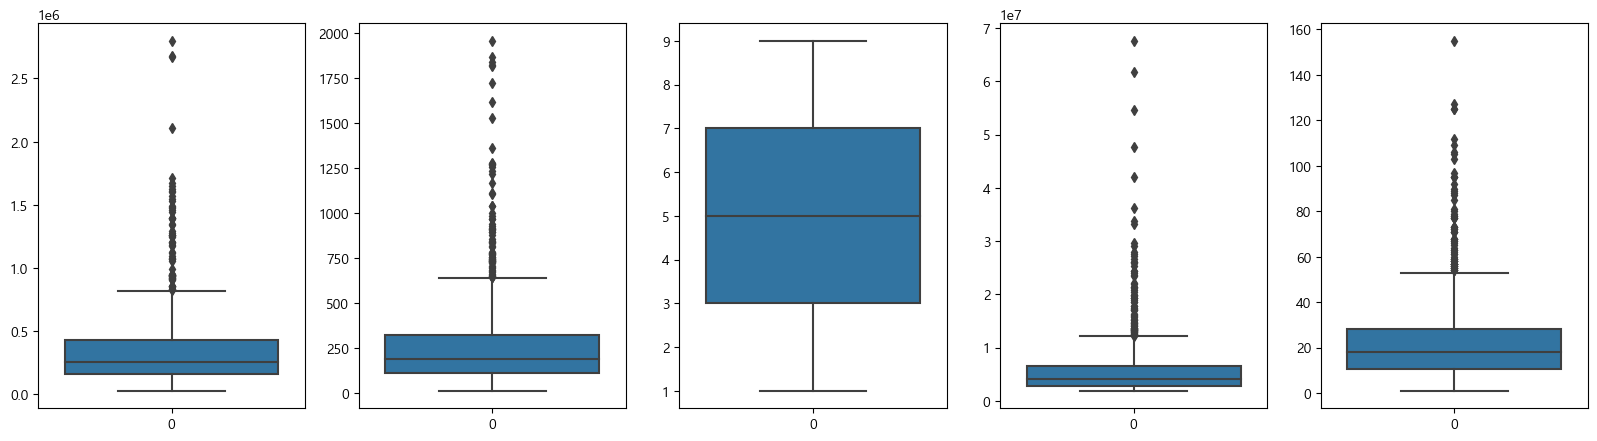

In [1]:
#1. 모듈 및 함수 불러오기 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    

#2. 변수 지정
df = pd.read_csv('Ashopping.csv', encoding ='cp949')                     
X=df[['1회 평균매출액', '평균 구매주기', '구매카테고리수', '총매출액', '방문빈도']]

#3. 한글 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#4. 5개의 서브 플롯 생성
fig, axs = plt.subplots(1,5, figsize = (20,5))

#5. 상자 그림 생성
sns.boxplot(data=X['1회 평균매출액'], ax = axs[0])
sns.boxplot(data=X['평균 구매주기'], ax = axs[1])
sns.boxplot(data=X['구매카테고리수'], ax = axs[2])
sns.boxplot(data=X['총매출액'], ax = axs[3])
sns.boxplot(data=X['방문빈도'], ax = axs[4])
plt.show()

In [2]:
#1. 모듈 및 함수 불러오기
from sklearn.preprocessing import StandardScaler

#2. 변수 리스트 생성
list=['1회 평균매출액', '평균 구매주기', '구매카테고리수', '총매출액', '방문빈도']

#3. IQR 범위 산정
for a in list :
    Q1 = X[a].quantile(0.25)
    Q3 = X[a].quantile(0.75)
    IQR = Q3 - Q1

    #4. 이상치 제거
    outlier_index = X[(X[a] < Q1 - 1.5*IQR) | (X[a] > Q3 + 1.5*IQR)].index
    X.drop(outlier_index, inplace=True)

#5. 표준화 
scaler = StandardScaler()
scaler.fit(X)
X_stand = scaler.transform(X)

#6. 결과 출력
X_stand.shape

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(774, 5)

- 계층적 군집분석 수행

In [3]:
#1. 모듈 및 함수 불러오기
from sklearn.cluster import AgglomerativeClustering

#2. 군집분석 모형 생성
agg = AgglomerativeClustering(linkage= 'ward')

#3. 군집분석 수행
Y_agg=agg.fit_predict(X_stand)
print(Y_agg)

[0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1
 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1
 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1
 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0
 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0
 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1
 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1
 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0
 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1
 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1
 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1
 1 1 1 1 1 0 1 0 0 1 1 0 

- 군집 품질 평가

In [4]:
#1. 모듈 및 함수 불러오기
from sklearn.metrics import silhouette_score, calinski_harabasz_score

#2. 실루엣 계수 및 CH 점수 출력
S_score = silhouette_score(X_stand, Y_agg)
C_score = calinski_harabasz_score(X_stand, Y_agg)

print("실루엣 계수: {:.3f}".format(S_score))
print("CH 점수: {:.3f}".format(C_score))

실루엣 계수: 0.285
CH 점수: 354.472


- 덴드로그램 생성

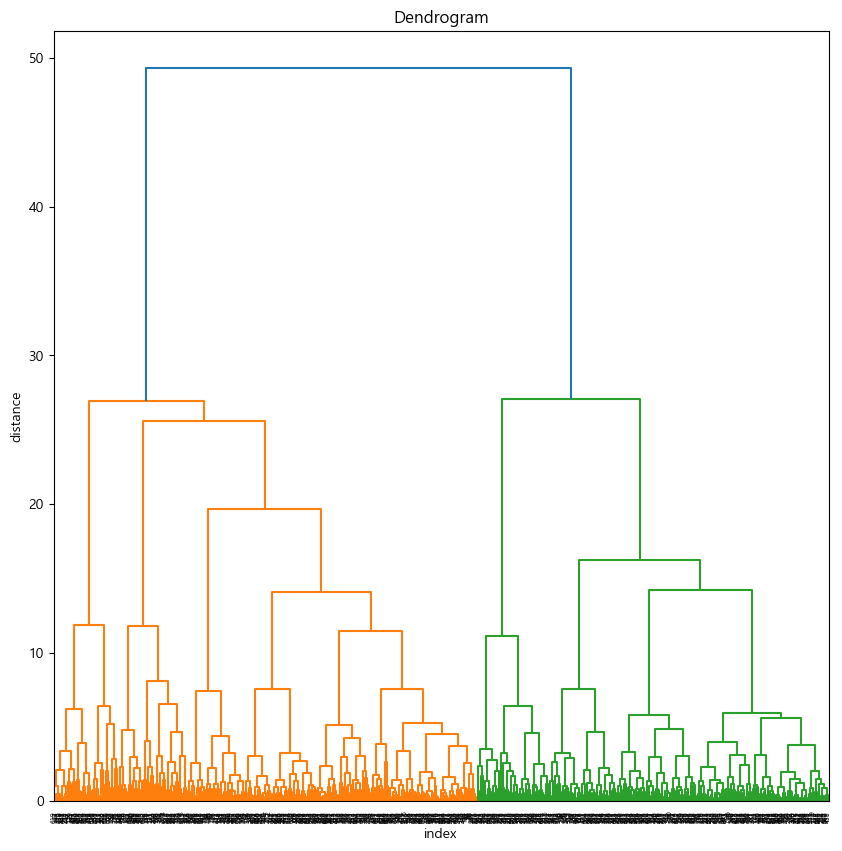

In [5]:
#1. 모듈 및 함수 불러오기
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

#2. 군집분석 수행
h_cluster= linkage(X_stand, method = 'ward')

#3. 덴드로그램 출력
plt.figure(figsize=(10, 10))
plt.title('Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
dendrogram(h_cluster)
plt.show()

### (2) K-평균 군집분석

- 최적 군집 수 판단 (Elbow Method 수행)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


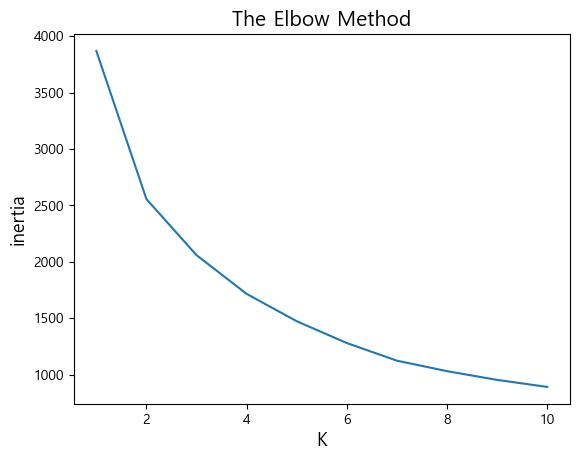

In [6]:
#1. 모듈 및 함수 불러오기
from sklearn.cluster import KMeans

#2. Inertia 값을 담을 빈 리스트 생성
inertia =[ ]

#3. K에 따른 inertia 값 계산 
for k in range(1,11):
    kmeans = KMeans(n_clusters= k, random_state=0)
    kmeans.fit_predict(X_stand)
    inertia.append(kmeans.inertia_)

#4. Elbow Method 그래프 출력
plt.plot(range(1,11), inertia)
plt.title('The Elbow Method', fontsize=15)
plt.xlabel('K', fontsize=13)
plt.ylabel('inertia', fontsize=13) 
plt.show()


- K-평균 군집분석 수행

In [7]:
#1. 모형 생성
kmeans = KMeans(n_clusters= 2, random_state=0)

#2. 군집분석 수행
Y_kmeans= kmeans.fit_predict(X_stand)
print(Y_kmeans)

[1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0
 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0
 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1
 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1
 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0
 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1
 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1
 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1
 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1
 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1
 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0
 0 0 0 0 0 1 1 1 1 0 1 1 

- 군집 품질 평가

In [8]:
S_score = silhouette_score(X_stand, Y_kmeans)
C_score = calinski_harabasz_score(X_stand, Y_kmeans)

print("실루엣 계수: {:.3f}".format(S_score))
print("CH 점수: {:.3f}".format(C_score))

실루엣 계수: 0.312
CH 점수: 396.618


### (3) DBSCAN 실습

- DBSCAN 군집분석 수행

In [9]:
#1. 모듈 및 함수 불러오기
from sklearn.cluster import DBSCAN

#2. 모형 생성
dbscan = DBSCAN(eps= 0.7, min_samples= 10)

#3. 모형 학습 및 예측
Y_dbscan = dbscan.fit_predict(X_stand)
print(Y_dbscan)

[ 0  0  0 -1 -1 -1  0  0  0  0  0 -1  0  0 -1 -1  0  0  0  0  0  0  0  0
  0 -1 -1  0  0  0 -1  0  0  0  0  0  0 -1 -1  2 -1  0  0  0  0  0 -1 -1
 -1  0  0  0  0  0  0  0 -1  0 -1  0  0 -1  0  0  0 -1  0  0  0  0  0 -1
 -1 -1  0  0 -1  0  0  1 -1  0  0  1  0  0  0 -1  0 -1 -1  0 -1 -1  0  0
  0  0 -1  0 -1  0 -1  0 -1  0 -1 -1  0  0 -1  0  0 -1  0 -1  0 -1  0 -1
  0  0 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1  0  0 -1  0  0 -1  0  0  0  0  0
  0 -1  0  0  0 -1  0  0  0  0  0 -1  2  0  0 -1  0  0  0  0 -1  0  0  0
 -1  0  0 -1  0  0  3 -1  0 -1 -1  0 -1  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0 -1  0  0 -1  0 -1  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  1 -1  0 -1  0  0  0  0  0 -1  0  0  0  0  2  0  0  0  0  1
  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  0  0  0  0  0
 -1  0  0  0  0 -1  0  0 -1  0  0  0  2  0 -1  0 -1  0  0  0  0  0  0  0
 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
 -1 -1  0 -1  0  0  0  0  0 -1 -1  0  0  0 -1  2  0

- 군집 품질 평가

In [10]:
S_score = silhouette_score(X_stand, Y_dbscan)
C_score = calinski_harabasz_score(X_stand, Y_dbscan)

print("실루엣 계수: {:.3f}".format(S_score))
print("calinski_harabasz 점수: {:.3f}".format(C_score))

실루엣 계수: 0.025
calinski_harabasz 점수: 39.961


### (4) 군집 프로파일링

In [11]:
#1. 군집별로 각 칼럼의 평균값을 시리즈(Series) 형태로 저장
X['cluster']=Y_kmeans
a = pd.Series(X.groupby('cluster')['1회 평균매출액'].mean())
b = pd.Series(X.groupby('cluster')['평균 구매주기'].mean())
c = pd.Series(X.groupby('cluster')['구매카테고리수'].mean())
d = pd.Series(X.groupby('cluster')['총매출액'].mean())
e = pd.Series(X.groupby('cluster')['방문빈도'].mean())

#2. 군집별 요약 정보를 갖는 데이터 프레임 생성
df2 = pd.concat([pd.Series([0,1]),a,b,c,d,e,], axis=1)
df2.columns = ["ClusterID", "1회 평균매출액", "평균 구매주기", "구매카테고리수",'총매출액', '방문빈도']
df2.head()

<ipython-input-11-b8d2a6d9eff0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster']=Y_kmeans


,ClusterID,1회 평균매출액,평균 구매주기,구매카테고리수,총매출액,방문빈도
0,0,343889.371353,317.440339,3.928382,3.828847e+06,11.933687
1,1,195844.604534,136.331861,6.375315,5.032220e+06,27.198992


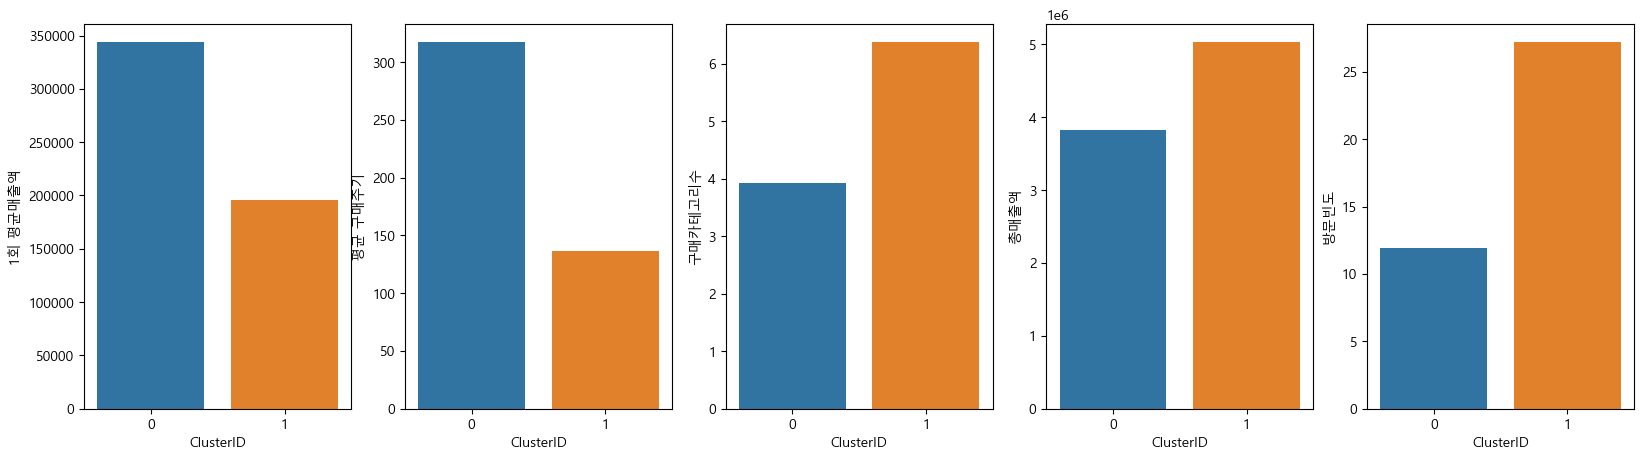

In [12]:
fig, axs = plt.subplots(1,5, figsize = (20, 5))
sns.barplot(x=df2.ClusterID, y=df2['1회 평균매출액'], ax = axs[0])
sns.barplot(x=df2.ClusterID, y=df2['평균 구매주기'], ax = axs[1])
sns.barplot(x=df2.ClusterID, y=df2['구매카테고리수'], ax = axs[2])
sns.barplot(x=df2.ClusterID, y=df2['총매출액'], ax = axs[3])
sns.barplot(x=df2.ClusterID, y=df2['방문빈도'], ax = axs[4])
plt.show()